In [1]:
import wooldridge as woo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns

In [2]:
wage = woo.data('wage1')

In [3]:
wage.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


# JB-Test & Outliers

In [4]:
reg = smf.ols('np.log(wage) ~ educ', data = wage)
results = reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     119.6
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           3.27e-25
Time:                        15:57:10   Log-Likelihood:                -359.38
No. Observations:                 526   AIC:                             722.8
Df Residuals:                     524   BIC:                             731.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5838      0.097      5.998      0.0

In [5]:
wage.describe()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
count,526.000000,526.000000,526.00000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,...,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,5.896103,12.562738,17.01711,5.104563,0.102662,0.479087,0.608365,1.043726,0.722433,0.250951,...,0.043726,0.287072,0.100760,0.258555,0.366920,0.167300,0.140684,1.623268,473.435361,78.150190
std,3.693086,2.769022,13.57216,7.224462,0.303805,0.500038,0.488580,1.261891,0.448225,0.433973,...,0.204680,0.452826,0.301298,0.438257,0.482423,0.373599,0.348027,0.531538,616.044772,199.434664
min,0.530000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.634878,1.000000,0.000000
25%,3.330000,12.000000,5.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.202972,25.000000,0.000000
50%,4.650000,12.000000,13.50000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.536867,182.500000,4.000000
75%,6.880000,14.000000,26.00000,7.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.750000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.928619,676.000000,49.000000
max,24.980000,18.000000,51.00000,44.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.218076,2601.000000,1936.000000


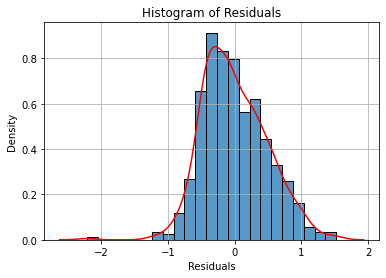

In [6]:
sns.kdeplot(results.resid, color = "red")
sns.histplot(results.resid, stat = "density")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.grid()

Method 1 - JB

In [7]:
def jarque_bera(results):
    uhat = results.resid
    
    # Pull variables
    S = stats.skew(uhat)
    k = stats.kurtosis(uhat, fisher = False)
    N = len(uhat)
    
    # calculate
    JB = (N/6)*(S**2+((k-3)**2)/4)
    
    return JB

In [8]:
jarque_bera(results)

13.811232434445925

Method 2 - Statsmodels

In [9]:
# get xrange, 用linspace进行排序
xrange = np.linspace(wage.educ.min(), wage.educ.max(), 200)

# Put in format that works with get_predictions()
new_data = pd.DataFrame(xrange, columns = ["educ"])

In [10]:
# Generate predictions over range
predictions = results.get_prediction(new_data)

# Generate table with intervals for each x
predictions = predictions.summary_frame(alpha=0.05)

predictions

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.583773,0.097336,0.392556,0.774989,-0.378532,1.546077
1,0.591257,0.096668,0.401354,0.781161,-0.370787,1.553301
2,0.598742,0.095999,0.410150,0.787333,-0.363045,1.560528
3,0.606226,0.095332,0.418947,0.793505,-0.355304,1.567756
4,0.613710,0.094664,0.427743,0.799678,-0.347565,1.574986
...,...,...,...,...,...,...
195,2.043234,0.043739,1.957309,2.129158,1.096212,2.990255
196,2.050718,0.044341,1.963611,2.137825,1.103589,2.997847
197,2.058202,0.044945,1.969907,2.146497,1.110963,3.005442
198,2.065687,0.045552,1.976200,2.155174,1.118336,3.013038


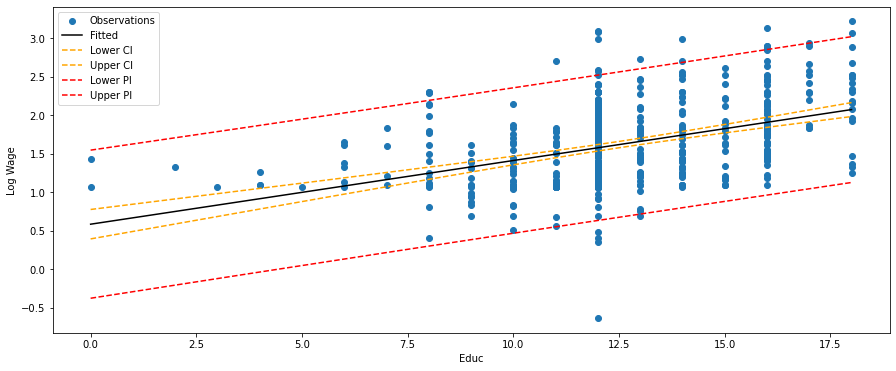

In [11]:
plt.figure(figsize = (15, 6))
plt.scatter(wage.educ, np.log(wage.wage))
plt.plot(xrange, predictions["mean"], color = "black")

plt.xlabel("Educ")
plt.ylabel("Log Wage")

# confidence Intervals
plt.plot(xrange, predictions["mean_ci_lower"], color = "orange", linestyle = '--')
plt.plot(xrange, predictions["mean_ci_upper"], color = "orange", linestyle = '--')

# prediction Intervals
plt.plot(xrange, predictions["obs_ci_lower"], color = "red", linestyle = '--')
plt.plot(xrange, predictions["obs_ci_upper"], color = "red", linestyle = '--')

plt.legend(["Observations", "Fitted", "Lower CI", "Upper CI","Lower PI", "Upper PI"])

# K-fold Cross Validation

In [12]:
#MSE - 放大对于异常值的影响
#RMSE - 缩小对于异常值的影响

In [13]:
wage[:25]

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.100000,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.240000,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.000000,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.000000,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.300000,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4
5,8.750000,16,9,8,0,0,1,0,1,0,...,0,0,0,1,1,0,0,2.169054,81,64
6,11.250000,18,15,7,0,0,0,0,1,0,...,0,1,0,0,1,0,0,2.420368,225,49
7,5.000000,12,5,3,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1.609438,25,9
8,3.600000,12,26,4,0,1,0,2,1,0,...,0,1,0,0,1,0,0,1.280934,676,16
9,18.180000,17,22,21,0,0,1,0,1,0,...,0,0,0,0,1,0,0,2.900322,484,441


In [14]:
from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits = 3)
for train_index, test_index in kf.split(wage):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265
 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283
 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301
 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319
 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337
 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355
 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373
 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391
 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409
 410 411 412 413 414 415 416 417 418 419 420

In [15]:
# split the data into 5 subsets
kf = KFold(n_splits = 5)

mse = []
for train_index, test_index in kf.split(wage):
    # train data over training set
    results = smf.ols('np.log(wage) ~ educ', wage.iloc[train_index]).fit()
    
    # test over last split 
    s = ((np.log(wage.iloc[test_index]["wage"]) - results.predict(wage.iloc[test_index]))**2).mean()
    
    # append test metric
    mse.append(s)

In [16]:
mse

[0.33639829991837095,
 0.23928225844245662,
 0.2055669785939707,
 0.16327773834154233,
 0.21864066138709337]

In [17]:
reg = smf.ols('np.log(wage) ~ educ', data = wage)
results = reg.fit()
(results.resid**2).mean()

0.22959908617474134

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

x = np.log(wage[['wage']])
y = wage[['educ']]

regr = LinearRegression()
scores = cross_val_score(regr, x, y, cv=5, scoring='neg_mean_squared_error')
print('5-Fold CV MSE Scores:', scores)

5-Fold CV MSE Scores: [-5.2784144  -5.49520917 -6.66632447 -7.20394507 -6.96133986]
